# Normalization -> Z-Score -> 3 STD

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data = pd.read_csv('../../Capstone/Data/FirstClean_MLB_Batting_Data.csv')
data.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,PA,G,...,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,OPS_plus,TOB_lg,TB_lg
0,Hank Aaron,26.0,110001.0,aaronha01,1960,MLN,1,NL,664,153,...,4.07285,1.854,1.828,0.5366,0.5266,0.5052,0.4824,156.1662,211.285,229.687
1,Hank Aaron,27.0,110001.0,aaronha01,1961,MLN,1,NL,671,155,...,4.38978,1.894,1.867,0.5452,0.5295,0.5132,0.4829,163.3027,218.152,244.516
2,Hank Aaron,28.0,110001.0,aaronha01,1962,MLN,1,NL,667,156,...,4.34324,1.891,1.861,0.5382,0.5343,0.5015,0.4831,169.8299,222.244,239.464
3,Hank Aaron,29.0,110001.0,aaronha01,1963,MLN,1,NL,714,161,...,3.65096,1.809,1.773,0.5396,0.5429,0.4914,0.4813,179.1695,224.696,238.707
4,Hank Aaron,30.0,110001.0,aaronha01,1964,MLN,1,NL,634,145,...,3.86564,1.827,1.802,0.5299,0.5270,0.4983,0.4820,152.6831,204.402,223.896


In [3]:
data=data.drop(['mlb_ID','player_ID','stint_ID','pitcher', 'salary'], axis=1)

In [4]:
data.dtypes

name_common            object
age                   float64
year_ID                 int64
team_ID                object
lg_ID                  object
PA                      int64
G                       int64
Inn                   float64
runs_bat              float64
runs_br               float64
runs_dp               float64
runs_field            float64
runs_infield          float64
runs_outfield         float64
runs_catcher          float64
runs_good_plays       float64
runs_defense          float64
runs_position         float64
runs_position_p       float64
runs_replacement      float64
runs_above_rep        float64
runs_above_avg        float64
runs_above_avg_off    float64
runs_above_avg_def    float64
WAA                   float64
WAA_off               float64
WAA_def               float64
WAR                   float64
WAR_def               float64
WAR_off               float64
WAR_rep               float64
teamRpG               float64
oppRpG                float64
oppRpPA_re

In [5]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['name_common', 'team_ID', 'lg_ID','year_ID',], axis=1)

In [6]:
data_num.head()

,age,PA,G,Inn,runs_bat,runs_br,runs_dp,runs_field,runs_infield,runs_outfield,...,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,OPS_plus,TOB_lg,TB_lg
0,26.0,664,153,1378.3,41.16,2.44,1.50,12.1,0.0,2.0,...,4.07285,1.854,1.828,0.5366,0.5266,0.5052,0.4824,156.1662,211.285,229.687
1,27.0,671,155,1376.0,43.88,4.49,0.95,16.4,0.0,7.0,...,4.38978,1.894,1.867,0.5452,0.5295,0.5132,0.4829,163.3027,218.152,244.516
2,28.0,667,156,1340.7,56.87,-0.16,-0.10,5.9,0.0,0.0,...,4.34324,1.891,1.861,0.5382,0.5343,0.5015,0.4831,169.8299,222.244,239.464
3,29.0,714,161,1446.0,61.53,6.80,0.02,-5.6,0.0,1.0,...,3.65096,1.809,1.773,0.5396,0.5429,0.4914,0.4813,179.1695,224.696,238.707
4,30.0,634,145,1233.3,38.09,5.57,-2.22,0.6,0.0,3.0,...,3.86564,1.827,1.802,0.5299,0.5270,0.4983,0.4820,152.6831,204.402,223.896


In [7]:
data_objects=data.drop(['age',
       'PA', 'G', 'Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def',
       'WAR', 'WAR_def', 'WAR_off', 'WAR_rep', 'teamRpG',
       'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'OPS_plus', 'TOB_lg', 'TB_lg'], axis=1)

In [8]:
data_objects.head()

,name_common,year_ID,team_ID,lg_ID
0,Hank Aaron,1960,MLN,NL
1,Hank Aaron,1961,MLN,NL
2,Hank Aaron,1962,MLN,NL
3,Hank Aaron,1963,MLN,NL
4,Hank Aaron,1964,MLN,NL


## Normalization
__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [9]:
data_num.skew()

age                   0.516150
PA                    0.532329
G                     0.157996
Inn                   0.477562
runs_bat              1.733955
runs_br               1.564463
runs_dp              -0.023148
runs_field            0.439512
runs_infield          0.405625
runs_outfield         0.786833
runs_catcher          1.631975
runs_good_plays       0.523446
runs_defense          0.468253
runs_position        -0.219672
runs_position_p       0.000000
runs_replacement      0.542947
runs_above_rep        1.817772
runs_above_avg        1.697316
runs_above_avg_off    1.862699
runs_above_avg_def    0.509141
WAA                   1.618253
WAA_off               1.749793
WAA_def               0.568643
WAR                   1.800244
WAR_def               0.568643
WAR_off               1.798807
WAR_rep               0.543498
teamRpG               0.088245
oppRpG                0.052847
oppRpPA_rep          -0.222625
oppRpG_rep            0.031762
pyth_exponent        -0.124668
pyth_exp

In [10]:
data_num["age.Skew"]= stats.yeojohnson(data_num["age"])[0]
data_num["PA.Skew"]= stats.yeojohnson(data_num["PA"])[0]
data_num["runs_bat.Skew"]= stats.yeojohnson(data_num["runs_bat"])[0]
data_num["runs_br.Skew"]= stats.yeojohnson(data_num["runs_br"])[0]
data_num["runs_outfield.Skew"]= stats.yeojohnson(data_num["runs_outfield"])[0]
data_num["runs_catcher.Skew"]= stats.yeojohnson(data_num["runs_catcher"])[0]
data_num["runs_good_plays.Skew"]= stats.yeojohnson(data_num["runs_good_plays"])[0]
data_num["runs_replacement.Skew"]= stats.yeojohnson(data_num["runs_replacement"])[0]
data_num["runs_above_rep.Skew"]= stats.yeojohnson(data_num["runs_above_rep"])[0]
data_num["runs_above_avg.Skew"]= stats.yeojohnson(data_num["runs_above_avg"])[0]
data_num["runs_above_avg_off.Skew"]= stats.yeojohnson(data_num["runs_above_avg_off"])[0]
data_num["runs_above_avg_def.Skew"]= stats.yeojohnson(data_num["runs_above_avg_def"])[0]
data_num["WAA.Skew"]= stats.yeojohnson(data_num["WAA"])[0]
data_num["WAA_off.Skew"]= stats.yeojohnson(data_num["WAA_off"])[0]
data_num["WAA_def.Skew"]= stats.yeojohnson(data_num["WAA_def"])[0]
data_num["WAR.Skew"]= stats.yeojohnson(data_num["WAR"])[0]
data_num["WAR_def.Skew"]= stats.yeojohnson(data_num["WAR_def"])[0]
data_num["WAR_off.Skew"]= stats.yeojohnson(data_num["WAR_off"])[0]
data_num["WAR_rep.Skew"]= stats.yeojohnson(data_num["WAR_rep"])[0]
data_num["waa_win_perc.Skew"]= stats.yeojohnson(data_num["waa_win_perc"])[0]
data_num["waa_win_perc_def.Skew"]= stats.yeojohnson(data_num["waa_win_perc_def"])[0]
data_num["TOB_lg.Skew"]= stats.yeojohnson(data_num["TOB_lg"])[0]
data_num["TB_lg.Skew"]= stats.yeojohnson(data_num["TB_lg"])[0]

In [11]:
data_num_norm=data_num.drop(["age",
"PA",
"runs_bat",
"runs_br",
"runs_outfield",
"runs_catcher",
"runs_good_plays",
"runs_replacement",
"runs_above_rep",
"runs_above_avg",
"runs_above_avg_off",
"runs_above_avg_def",
"WAA",
"WAA_off",
"WAA_def",
"WAR",
"WAR_def",
"WAR_off",
"WAR_rep",
"waa_win_perc",
"waa_win_perc_def",
"TOB_lg",
"TB_lg"],axis=1)

In [12]:
data_num_norm.skew()

G                          0.157996
Inn                        0.477562
runs_dp                   -0.023148
runs_field                 0.439512
runs_infield               0.405625
runs_defense               0.468253
runs_position             -0.219672
runs_position_p            0.000000
teamRpG                    0.088245
oppRpG                     0.052847
oppRpPA_rep               -0.222625
oppRpG_rep                 0.031762
pyth_exponent             -0.124668
pyth_exponent_rep         -0.137138
waa_win_perc_off          -0.349254
waa_win_perc_rep           0.484413
OPS_plus                   0.375945
age.Skew                   0.008544
PA.Skew                   -0.216623
runs_bat.Skew             -0.326965
runs_br.Skew              -0.148968
runs_outfield.Skew        -0.072817
runs_catcher.Skew         -0.227631
runs_good_plays.Skew      -0.117818
runs_replacement.Skew     -0.108136
runs_above_rep.Skew       -0.253917
runs_above_avg.Skew       -0.301618
runs_above_avg_off.Skew   -0

In [13]:
data_num_norm.columns

Index(['G', 'Inn', 'runs_dp', 'runs_field', 'runs_infield', 'runs_defense',
       'runs_position', 'runs_position_p', 'teamRpG', 'oppRpG', 'oppRpPA_rep',
       'oppRpG_rep', 'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc_off',
       'waa_win_perc_rep', 'OPS_plus', 'age.Skew', 'PA.Skew', 'runs_bat.Skew',
       'runs_br.Skew', 'runs_outfield.Skew', 'runs_catcher.Skew',
       'runs_good_plays.Skew', 'runs_replacement.Skew', 'runs_above_rep.Skew',
       'runs_above_avg.Skew', 'runs_above_avg_off.Skew',
       'runs_above_avg_def.Skew', 'WAA.Skew', 'WAA_off.Skew', 'WAA_def.Skew',
       'WAR.Skew', 'WAR_def.Skew', 'WAR_off.Skew', 'WAR_rep.Skew',
       'waa_win_perc.Skew', 'waa_win_perc_def.Skew', 'TOB_lg.Skew',
       'TB_lg.Skew'],
      dtype='object')

**_The data has been successfully normalized, as the skew values are between -0.5 and 0.5._**

## Z Score

In [14]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num_norm = scaler.fit_transform(data_num_norm)
data_num_zs = pd.DataFrame(data_num_norm)

In [15]:
data_num_zs.columns=['G', 'Inn', 'runs_dp', 'runs_field', 'runs_infield', 'runs_defense',
       'runs_position', 'runs_position_p', 'teamRpG', 'oppRpG', 'oppRpPA_rep',
       'oppRpG_rep', 'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc_off',
       'waa_win_perc_rep', 'OPS_plus', 'age', 'PA', 'runs_bat',
       'runs_br', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_replacement', 'runs_above_rep',
       'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def',
       'WAR', 'WAR_def', 'WAR_off', 'WAR_rep',
       'waa_win_perc', 'waa_win_perc_def', 'TOB_lg',
       'TB_lg']

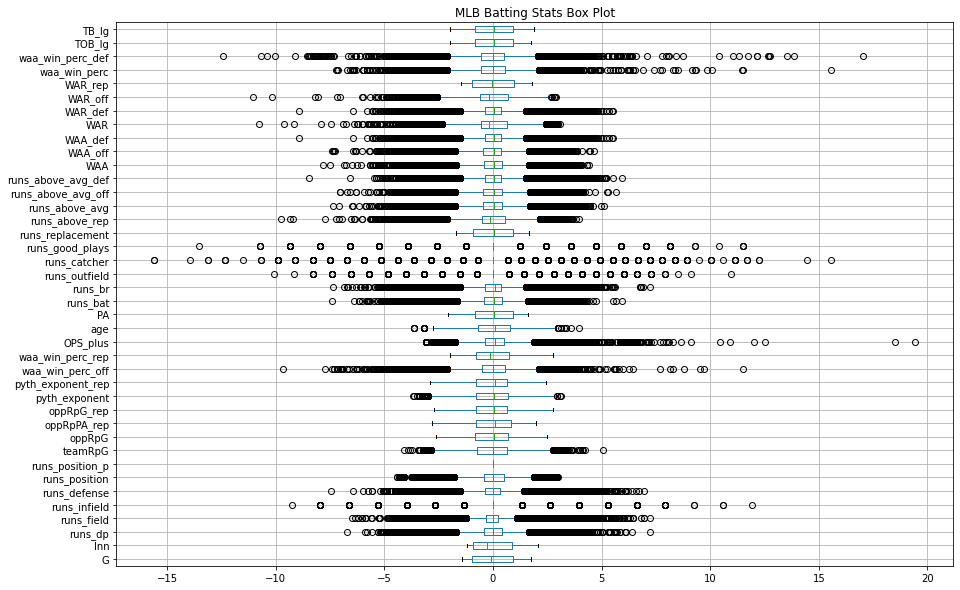

In [16]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('MLB Batting Stats Box Plot')
plt.show()

**_There are many outliers. Lets see what 3 STD does_**

## 3 STD

In [17]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [18]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

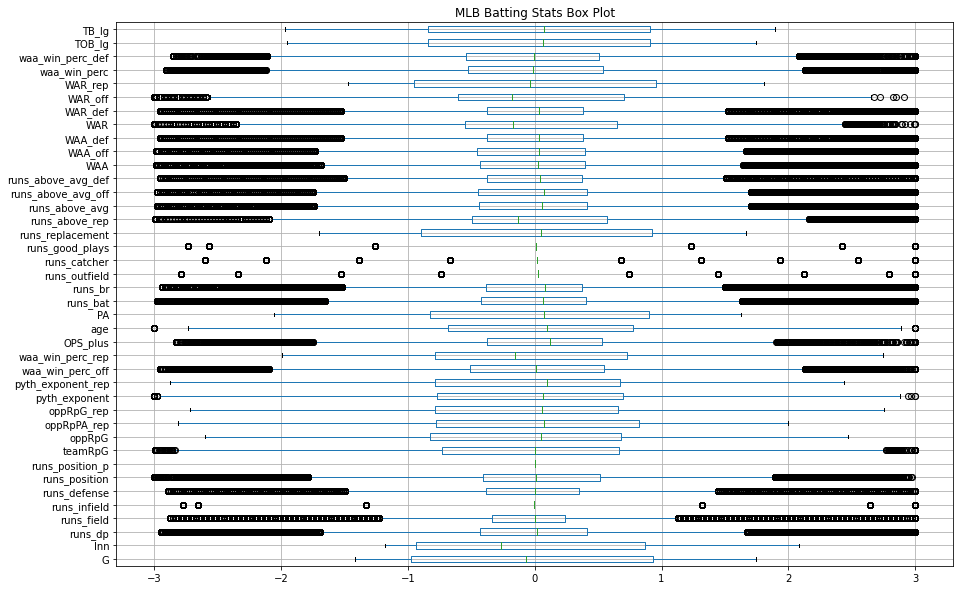

In [19]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('MLB Batting Stats Box Plot')
plt.show()

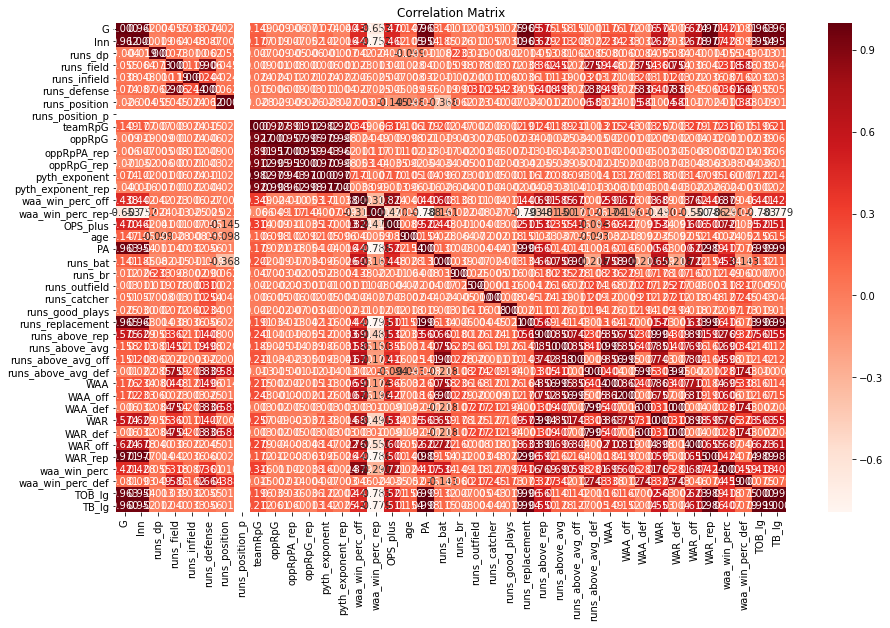

In [20]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [21]:
MLB_Bpipeline1=pd.concat([data_objects,data_num_zs], axis=1)

In [22]:
MLB_Bpipeline1.head()

,name_common,year_ID,team_ID,lg_ID,G,Inn,runs_dp,runs_field,runs_infield,runs_defense,...,WAA_off,WAA_def,WAR,WAR_def,WAR_off,WAR_rep,waa_win_perc,waa_win_perc_def,TOB_lg,TB_lg
0,Hank Aaron,1960,MLN,NL,1.514090,1.838357,1.648867,2.433301,-0.005106,2.450609,...,2.531284,1.040340,2.441342,1.040340,2.174799,1.688243,2.320963,0.547465,1.359519,1.339687
1,Hank Aaron,1961,MLN,NL,1.552709,1.833314,1.050723,3.000042,-0.005106,3.000042,...,2.738084,2.493103,2.672664,2.493103,2.263762,1.705396,2.850975,1.337766,1.402763,1.424682
2,Hank Aaron,1962,MLN,NL,1.572018,1.755907,-0.091187,1.187347,-0.005106,1.026044,...,3.000042,0.446613,2.530875,0.446613,2.382200,1.699700,2.418283,0.188145,1.428110,1.396112
3,Hank Aaron,1963,MLN,NL,1.668565,1.986811,0.039317,-1.123696,-0.005106,-0.798094,...,3.000042,-1.889587,2.622474,-1.889587,2.606304,1.782942,2.503918,-0.773077,1.443153,1.391798
4,Hank Aaron,1964,MLN,NL,1.359614,1.520399,-2.396758,0.122258,-0.005106,0.626471,...,2.481054,-0.162122,2.229027,-0.162122,2.127876,1.599428,1.919724,-0.119493,1.315241,1.305525


In [23]:
MLB_Bpipeline1.to_csv('../../Capstone/Data/MLB_Bpipeline1.csv', index=0)